In [ ]:
pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=4bf9de3826215e5b2be9513245ddc7986da59e13dd6311dfa58425835a60237d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


58.78048780487803


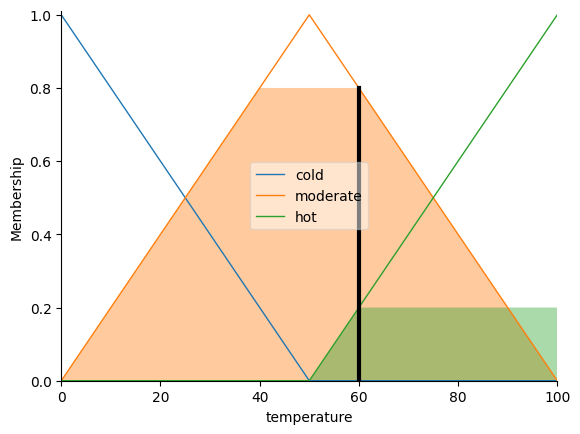

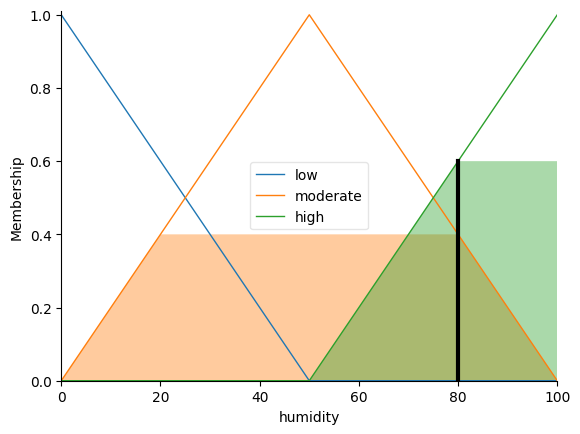

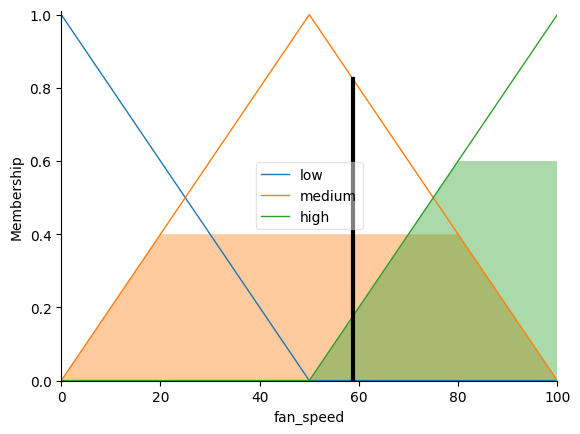

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Input variables
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Define membership functions for input and output variables
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['moderate'] = fuzz.trimf(temperature.universe, [0, 50, 100])
temperature['hot'] = fuzz.trimf(temperature.universe, [50, 100, 100])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['moderate'] = fuzz.trimf(humidity.universe, [0, 50, 100])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [0, 50, 100])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

# Define rules
rule1 = ctrl.Rule(temperature['cold'] | humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['moderate'] & humidity['moderate'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['hot'] | humidity['high'], fan_speed['high'])

# Create a control system
fan_speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Create a simulation
fan_speed_sim = ctrl.ControlSystemSimulation(fan_speed_ctrl)

# Input values (e.g., temperature=30, humidity=70)
fan_speed_sim.input['temperature'] = 60
fan_speed_sim.input['humidity'] = 80

# Perform the simulation
fan_speed_sim.compute()

# Output fan speed
print(fan_speed_sim.output['fan_speed'])

# Visualize the results
temperature.view(sim=fan_speed_sim)
humidity.view(sim=fan_speed_sim)
fan_speed.view(sim=fan_speed_sim)
